# Exploring Data

In this notebook we're just going to explore the data without trying to do anything 'complicated'. So if we have numeric, tabular data then we will work with it like it was in Excel. If we have spatial data we will work with it to make a map. We will *not* try to link them together until the very end. 

## Loading Data

In this section we download the data from a remote server and save it to a working directory on our computer.

### Setup

In [1]:
from pathlib import Path

src_dir = Path.home() / Path('work/data/clean')

if not src_dir.exists():
    src_dir.mkdir(parents=True)
    print(f"Creating a 'clean' directory for data in {src_dir}.")

Below we are setting up some basic *variables* that we'll use to manage the download porcess. The data is all accessible from a CASA server called 'Orca' (`base_url`) and then we have a list of the data and geodata that we will need to download. Note that, when approaching a problem with code, we can be 'lazy' and not even specify the file extension (`.parquet`) because we can *add* then when downloading each file.

In [2]:
base_url = 'https://orca.casa.ucl.ac.uk/~jreades/jaipur'

files = [
    'assets', 'condition', 'materials', 'occupancy', 'structure', 'utilities', 'ward_population', 'jaipur_population'
]

print(f"The tabular data files are: {', '.join(files)}")

The tabular data files are: assets, condition, materials, occupancy, structure, utilities, ward_population, jaipur_population


### Download

Notice the `exists()` part -- we are checking for the existence of a file locally *before* we try to download it!

In [3]:
# urlretrieve is a function (provided by Python) for 
# downloading a file from a URL and saving it locally
from urllib.request import urlretrieve

# For each tabular data file
for f in files:
    print(f"Retrieving {f} table.")
    save_path = Path(src_dir / f"{f}.parquet")
    if save_path.exists():
        print("\tAlready downloaded this data...")
    else: 
        print("\tDownloading...")
        urlretrieve(f"{base_url}/{f}.parquet", save_path)

Retrieving assets table.
	Already downloaded this data...
Retrieving condition table.
	Already downloaded this data...
Retrieving materials table.
	Already downloaded this data...
Retrieving occupancy table.
	Already downloaded this data...
Retrieving structure table.
	Already downloaded this data...
Retrieving utilities table.
	Already downloaded this data...
Retrieving ward_population table.
	Already downloaded this data...
Retrieving jaipur_population table.
	Already downloaded this data...


## Tabular Data

Reading tables (this can include Excel, CSV, and other types of tabular data) is easily done using the `pandas` library, which we here import using the `pd` alias, so wherever you see `pd.` we are using a tool from the pandas library. The name of a table in pandas is a 'data frame', often abbreviated to `df`.

In [4]:
import pandas as pd

### House Condition Data

Read in the housing condition data for Jaipur. This is something that I prepared earlier using the code in the [Manage Data](./Manage_Data.ipynb) notebook. The code in that notebook is quite a bit more complex because the Census data is quite complex, but as you develop your understanding of pandas and Python you will probably find it useful!

In [5]:
df = pd.read_parquet(src_dir / 'condition.parquet')

### Inspecting the Data Frame

Pandas can speak to JupyterLab to produce prettily-formatted data like this:

In [6]:
df.head(3)

,state_code,state_name,district_code,district_name,tehsil_code,tehsil_name,town_code_village_code,ward_no,area_name,rural_urban,...,house_condition_total_livable,house_condition_total_dilapidated,house_condition_residence_total,house_condition_residence_good,house_condition_residence_livable,house_condition_residence_dilapidated,house_condition_residence_cum_other_use_total,house_condition_residence_cum_other_use_good,house_condition_residence_cum_other_use_livable,house_condition_residence_cum_other_use_dilapidated
0,8,RAJASTHAN,110,Jaipur,546,Jaipur,800522,1,Jaipur (M Corp.) (Part) - Ward No.1,Urban,...,34.1,1.6,97.9,63.2,33.1,1.6,2.1,1.1,0.9,0.0
1,8,RAJASTHAN,110,Jaipur,546,Jaipur,800522,2,Jaipur (M Corp.) (Part) - Ward No.2,Urban,...,25.6,0.8,96.6,71.3,24.6,0.8,3.4,2.3,1.0,0.0
2,8,RAJASTHAN,110,Jaipur,546,Jaipur,800522,3,Jaipur (M Corp.) (Part) - Ward No.3,Urban,...,21.8,1.1,95.0,73.3,20.6,1.0,5.0,3.7,1.2,0.1


List the columns:

In [7]:
print(df.columns.to_list())

['state_code', 'state_name', 'district_code', 'district_name', 'tehsil_code', 'tehsil_name', 'town_code_village_code', 'ward_no', 'area_name', 'rural_urban', 'house_condition_total_total', 'house_condition_total_good', 'house_condition_total_livable', 'house_condition_total_dilapidated', 'house_condition_residence_total', 'house_condition_residence_good', 'house_condition_residence_livable', 'house_condition_residence_dilapidated', 'house_condition_residence_cum_other_use_total', 'house_condition_residence_cum_other_use_good', 'house_condition_residence_cum_other_use_livable', 'house_condition_residence_cum_other_use_dilapidated']


Get descriptive statistics for the data frame:

In [8]:
df.describe()

,state_code,district_code,tehsil_code,town_code_village_code,ward_no,house_condition_total_total,house_condition_total_good,house_condition_total_livable,house_condition_total_dilapidated,house_condition_residence_total,house_condition_residence_good,house_condition_residence_livable,house_condition_residence_dilapidated,house_condition_residence_cum_other_use_total,house_condition_residence_cum_other_use_good,house_condition_residence_cum_other_use_livable,house_condition_residence_cum_other_use_dilapidated
count,65.0,65.0,65.0,65.0,65.000000,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,8.0,110.0,546.0,800522.0,40.723077,100.0,71.241538,27.646154,1.109231,96.509231,69.024615,26.423077,1.067692,3.490769,2.218462,1.226154,0.029231
std,0.0,0.0,0.0,0.0,23.924038,0.0,13.210541,12.711303,0.866697,1.553496,13.021137,12.322842,0.854237,1.553496,0.980894,0.825052,0.080473
min,8.0,110.0,546.0,800522.0,1.000000,100.0,30.000000,9.600000,0.000000,91.000000,29.300000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.0,110.0,546.0,800522.0,17.000000,100.0,62.900000,19.100000,0.400000,95.800000,61.100000,17.700000,0.400000,2.600000,1.600000,0.700000,0.000000
50%,8.0,110.0,546.0,800522.0,45.000000,100.0,73.600000,25.600000,0.900000,96.800000,71.300000,24.600000,0.800000,3.200000,2.000000,1.000000,0.000000
75%,8.0,110.0,546.0,800522.0,61.000000,100.0,80.100000,34.800000,1.500000,97.400000,76.700000,33.100000,1.300000,4.200000,2.800000,1.600000,0.000000
max,8.0,110.0,546.0,800522.0,77.000000,100.0,90.100000,67.500000,4.100000,100.000000,88.300000,66.000000,4.100000,9.000000,5.600000,4.800000,0.500000


Get descriptive statistics for only a few columns from the data frame:

In [9]:
df[['house_condition_total_good','house_condition_total_livable', 'house_condition_total_dilapidated']].describe()

,house_condition_total_good,house_condition_total_livable,house_condition_total_dilapidated
count,65.000000,65.000000,65.000000
mean,71.241538,27.646154,1.109231
std,13.210541,12.711303,0.866697
min,30.000000,9.600000,0.000000
25%,62.900000,19.100000,0.400000
50%,73.600000,25.600000,0.900000
75%,80.100000,34.800000,1.500000
max,90.100000,67.500000,4.100000


Show the first few lines for a subset of columns. 

<div class="alert alert-block alert-success">
    &#9745; <b>Notice</b> the <b>:</b> between the start and end columns (total and dilapidated below), that tells pandas it's a range!
</div>

In [10]:
df.loc[:, 'house_condition_total_total':'house_condition_total_dilapidated'].head()

,house_condition_total_total,house_condition_total_good,house_condition_total_livable,house_condition_total_dilapidated
0,100,64.3,34.1,1.6
1,100,73.6,25.6,0.8
2,100,77.1,21.8,1.1
3,100,74.7,24.0,1.3
4,100,84.7,12.2,3.1


In [11]:
df.house_condition_total_good

0     64.3
1     73.6
2     77.1
3     74.7
4     84.7
      ... 
60    61.0
61    78.7
62    69.5
63    76.8
64    59.8
Name: house_condition_total_good, Length: 65, dtype: float64

<Axes: ylabel='Frequency'>

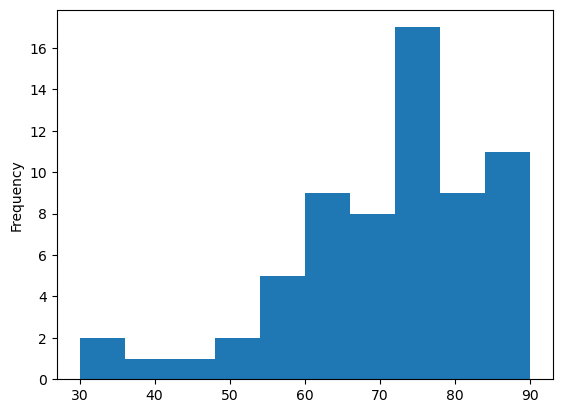

In [12]:
df.house_condition_total_good.plot.hist()

Using the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html) can you work out how to change the plot so that:

- There are 20 bins.
- The plot is 70% opaque


<Axes: ylabel='Frequency'>

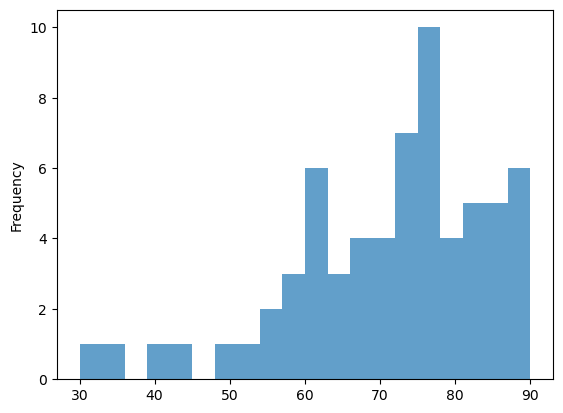

In [13]:
df.house_condition_total_good.plot.hist(bins=20, alpha=0.7)

<Axes: xlabel='house_condition_total_good', ylabel='house_condition_total_dilapidated'>

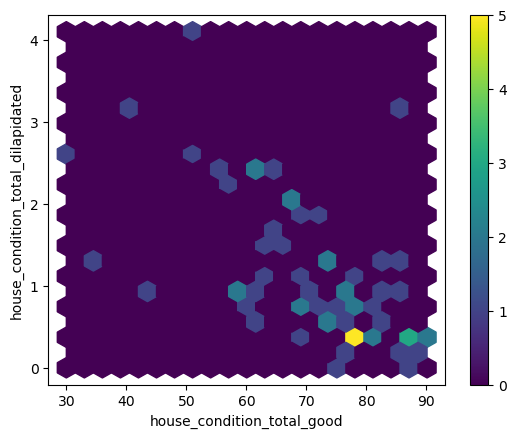

In [14]:
df.plot.hexbin(x='house_condition_total_good', y='house_condition_total_dilapidated', gridsize=20, cmap='viridis')

It's (potentially) interesting tha there are a few wards that are a long way off the diagonal. Is there anything special about them? Let's try to select them out of the data! We're going to do this crudely using the data itself.

In [15]:
of_interest = df[
                    ((df.house_condition_total_good < 55) | (df.house_condition_total_dilapidated > 3))
                ].copy()
of_interest[['ward_no','area_name','house_condition_total_good','house_condition_total_dilapidated']]

,ward_no,area_name,house_condition_total_good,house_condition_total_dilapidated
4,5,Jaipur (M Corp.) (Part) - Ward No.5,84.7,3.1
31,44,Jaipur (M Corp.) (Part) - Ward No.44,51.4,4.1
35,48,Jaipur (M Corp.) (Part) - Ward No.48,30.0,2.5
41,54,Jaipur (M Corp.) (Part) - Ward No.54,41.7,3.1
45,58,Jaipur (M Corp.) (Part) - Ward No.58,44.6,0.9
54,67,Jaipur (M Corp.) (Part) - Ward No.67,50.3,2.6
56,69,Jaipur (M Corp.) (Part) - Ward No.69,33.3,1.3
